# DECA
DECA reconstructs a 3D head model with detailed facial geometry from a single input image. The resulting 3D head model can be easily animated. The official github repository can be found [here](https://github.com/YadiraF/DECA) . This is a Colab Notebook for fast setup and run of the model!

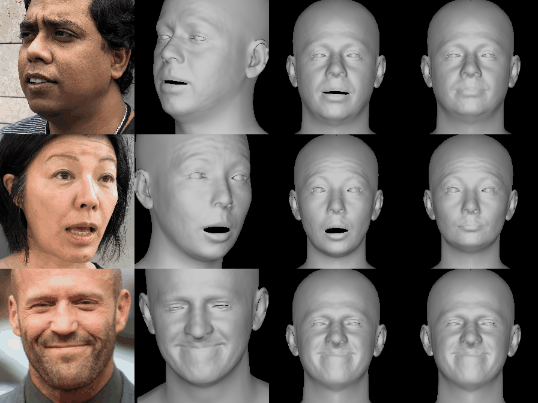

## CUDA Availability
Check if there are any available CUDA GPU devices.

In [1]:
### Check CUDA devices exist
import torch
print("Is CUDA available", torch.cuda.is_available())
print("Cuda device count is ",torch.cuda.device_count())
print("Current CUDA device is", torch.cuda.current_device())

Is CUDA available True
Cuda device count is  1
Current CUDA device is 0


 **requires** a GPU. If there are no CUDA Available GPUs, you can always run the notebook on colab and use a free GPU by selecting:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

## Install DECA model

### Install DECA model repo

In [2]:
### Install DECA model repo
!git clone https://github.com/YadiraF/DECA
%cd DECA

Cloning into 'DECA'...
remote: Enumerating objects: 378, done.
remote: Total 378 (delta 0), reused 0 (delta 0), pack-reused 378
Receiving objects: 100% (378/378), 22.91 MiB | 23.07 MiB/s, done.
Resolving deltas: 100% (152/152), done.
/content/DECA


### Install requirements

In [3]:
### Install requirements
!pip install -r requirements.txt

     |████████████████████████████████| 50 kB 4.7 MB/s 
     |████████████████████████████████| 274 kB 9.9 MB/s 
     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 5.9 MB 54.8 MB/s 
     |████████████████████████████████| 195 kB 63.0 MB/s 
     |████████████████████████████████| 108 kB 73.4 MB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.1.1-cp37-cp37m-linux_x86_64.whl size=44114 sha256=1542cd117d29b9e547fc1e6d3b1cd6d320ab1257d8673de4500c3a2d6fff8ea4
  Stored in directory: /root/.cache/pip/wheels/6f/a6/e1/6ab3225ed36801d672de2a9a8b04b30e4b1ac9efe3fa31c7a1
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58285 sha256=44c35f3c4f28743101300a14a51e41b8bdb5a8600821c44a16ba88b7d90f89ce
  Stored in directory: /root/.cache/pip/wheels/59/68/de/5e0c5d77e573e8c150e69e07a25035e6b6a04952d6e1814dbc
  Created wheel for face-alignment: filename=face_alignment-1.3.5-py2.py3-n

### Download FLAME model

Download FLAME model [here](https://flame.is.tue.mpg.de/download.php) (requires login) (FLAME 2020 model), unzip it and place it in Google Drive

In [4]:
flame_model = '/content/drive/MyDrive/voca/FLAME2020.zip'
#!unzip [flame_model] -d /content/sample_data/
!unzip /content/drive/MyDrive/voca/FLAME2020.zip -d /content/sample_data/
!cp /content/sample_data/generic_model.pkl /content/DECA/data/

Archive:  /content/drive/MyDrive/voca/FLAME2020.zip
  inflating: /content/sample_data/female_model.pkl  
  inflating: /content/sample_data/generic_model.pkl  
  inflating: /content/sample_data/male_model.pkl  
  inflating: /content/sample_data/Readme.pdf  


### Download DECA trained model
If it does not download automatically, then manually download it and place it under /content/DECA/data

In [5]:
!pip install gdown
import gdown
try:
  deca_url = 'https://drive.google.com/uc?id=1rp8kdyLPvErw2dTmqtjISRVvQLj6Yzje'
  output = '/content/DECA/data/deca_model.tar'
  gdown.download(deca_url, output, quiet=False)
except:
  os.system("!cp /content/drive/MyDrive/deca/dea_model.tar /content/DECA/data/")

Downloading...
From: https://drive.google.com/uc?id=1rp8kdyLPvErw2dTmqtjISRVvQLj6Yzje
To: /content/DECA/data/deca_model.tar
100%|██████████| 434M/434M [00:03<00:00, 124MB/s] 


### Get the npy file to enable textured 3D avatar generation

In [6]:
%cd /content/
!pip install numpy==1.19.4
!pip install h5py==3.1.0
!pip install chumpy==0.70 
!pip install opencv-python==4.4.0.46
!git clone https://github.com/TimoBolkart/BFM_to_FLAME.git

/content
     |████████████████████████████████| 14.5 MB 5.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.6.0 which is incompatible.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 49.5 MB 2.1 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Cloning into 'BFM_to_FLAME'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 97 (delta 32), reused 48 (delta 6), pack-reused 0
Unpacking objects: 100% (97/97), done.


In [7]:
!wget -O /content/BFM_to_FLAME/data/mask_inpainting.npz http://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz

--2022-05-05 14:00:39--  http://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz
Resolving files.is.tue.mpg.de (files.is.tue.mpg.de)... 192.124.27.148
Connecting to files.is.tue.mpg.de (files.is.tue.mpg.de)|192.124.27.148|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz [following]
--2022-05-05 14:00:40--  https://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz
Connecting to files.is.tue.mpg.de (files.is.tue.mpg.de)|192.124.27.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78643654 (75M) [application/octet-stream]
Saving to: ‘/content/BFM_to_FLAME/data/mask_inpainting.npz’

/content/BFM_to_FLA 100%[===================>]  75.00M  23.8MB/s    in 3.2s    

2022-05-05 14:00:43 (23.8 MB/s) - ‘/content/BFM_to_FLAME/data/mask_inpainting.npz’ saved [78643654/78643654]



Download BFM 2017 model (i.e. 'model2017-1_bfm_nomouth.h5') [here](https://faces.dmi.unibas.ch/bfm/bfm2017.html) and place it under **/content/BFM_to_FLAME/model**

In [8]:
%cd /content/BFM_to_FLAME/
!cp /content/drive/MyDrive/model2017-1_bfm_nomouth.h5 /content/BFM_to_FLAME/model/model2017-1_bfm_nomouth.h5
!python col_to_tex.py

/content/BFM_to_FLAME
Conversion started......
tcmalloc: large alloc 1251999744 bytes == 0x4aed8000 @  0x7f604cb5b001 0x7f6040c1a54f 0x7f6040c6ab08 0x7f6040c6ec07 0x7f6040d0d063 0x593784 0x548c51 0x51566f 0x593dd7 0x5118f8 0x593dd7 0x5118f8 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206 0x64faf2 0x64fc4e 0x7f604c756c87 0x5b621a
Conversion finished


In [9]:
!cp /content/BFM_to_FLAME/output/FLAME_albedo_from_BFM.npz /content/drive/MyDrive/FLAME_albedo_from_BFM.npz #store it also in Google Drive (for quick retrieval)
!cp /content/BFM_to_FLAME/output/FLAME_albedo_from_BFM.npz /content/DECA/data/FLAME_albedo_from_BFM.npz

## Demo Time
Reconstruct the 3D avatar from a number of sample images. You can produce the 3D mesh either texture or untextured (depending on the texture flag). Specifically given a 2D image, we visualize the predicted 2D landmanks, 3D landmarks (red means non-visible points), coarse geometry, detailed geometry, and depth.



### Reconstruct Demo examples

In [10]:
%cd /content/DECA/
!python demos/demo_reconstruct.py -i TestSamples/examples --saveDepth True --saveObj True

/content/DECA
Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100% 85.7M/85.7M [00:05<00:00, 17.2MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4_1.6-c827573f02.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4_1.6-c827573f02.zip
100% 91.9M/91.9M [00:05<00:00, 18.4MB/s]
creating the FLAME Decoder
trained model found. load /content/DECA/data/deca_model.tar
  0% 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/content/DECA/decalib/deca.py:128: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output 

### Personalized reconstruction: 

Select an image and place it under your custom directory (e.g my_examples) to produce the 3D avatar meshes. All images under the directory, will be reconstructed in 3D. Here we use images of both real and synthetic people in our test samples.

In [11]:
!sudo apt install wget
!mkdir /content/DECA/TestSamples/my_examples # make folder
#you can even manually drag and drop images to this folder
#or just transfer from the internet
!wget -O /content/DECA/TestSamples/my_examples/synthetic.png "https://www.dropbox.com/s/l1ioo2hf3gu397g/avatar_1.jpg?dl=1" #change dropbox link frmo dl=0 to dl=1
!wget -O /content/DECA/TestSamples/my_examples/real_test.png "https://www.dropbox.com/s/9tq8ipsgbgqaljw/anna.png?dl=1" #"https://www.dropbox.com/s/cdcvx8btnw8z1ga/chris.jpg?dl=1" # replace here your photo

Reading package lists... Done
Building dependency tree       
Reading state information... Done
wget is already the newest version (1.19.4-1ubuntu2.2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
--2022-05-05 14:03:07--  https://www.dropbox.com/s/l1ioo2hf3gu397g/avatar_1.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/l1ioo2hf3gu397g/avatar_1.jpg [following]
--2022-05-05 14:03:07--  https://www.dropbox.com/s/dl/l1ioo2hf3gu397g/avatar_1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce87c15c562de10bf912219b715.dl.dropboxu

Resize images for better 3D reconstruction (Method)

In [12]:
### Resize images
!pip install opencv-python
import cv2
def resize_image(img_path, width=224, height=224):

  img = cv2.imread(img_path) #, cv2.IMREAD_UNCHANGED)
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return resized

In [13]:
### Resize all images in the root directory
import os
root_path = "/content/DECA/TestSamples/my_examples/"
for files in os.listdir(root_path):
  fullpath = os.path.join(root_path, files)
  resized = resize_image(fullpath) #resize each image file
  cv2.imwrite(fullpath, resized)

**3D reconstruction of avatar face from custom face images**: 


Results are stored under /content/DECA/TestSamples/my_examples/results

In [14]:
### 3D reconstruction of custom face to avatar mesh
!python demos/demo_reconstruct.py -i TestSamples/my_examples --savefolder TestSamples/my_examples/results \
--saveDepth True --saveObj True --useTex True

creating the FLAME Decoder
tcmalloc: large alloc 1251999744 bytes == 0x6691c000 @  0x7f68f87621e7 0x7f68ec82346e 0x7f68ec873c2b 0x7f68ec826ce8 0x5947d6 0x548cc1 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x4bc98a 0x533274 0x4d3969 0x512147 0x549e0e 0x4bcb19 0x532b86 0x594a96 0x515600 0x549e0e 0x593fce 0x548ae9 0x51566f 0x549e0e 0x4bca8a 0x532b86 0x594a96 0x548cc1 0x5127f1 0x593dd7
trained model found. load /content/DECA/data/deca_model.tar
  0% 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/content/DECA/decalib/deca.py:128: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output channels_last tensor even if some

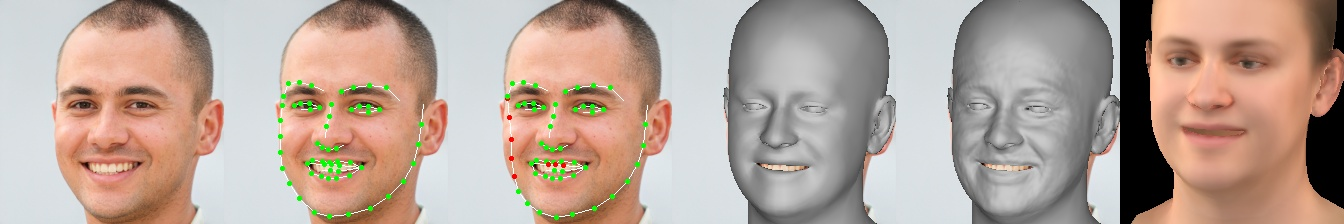

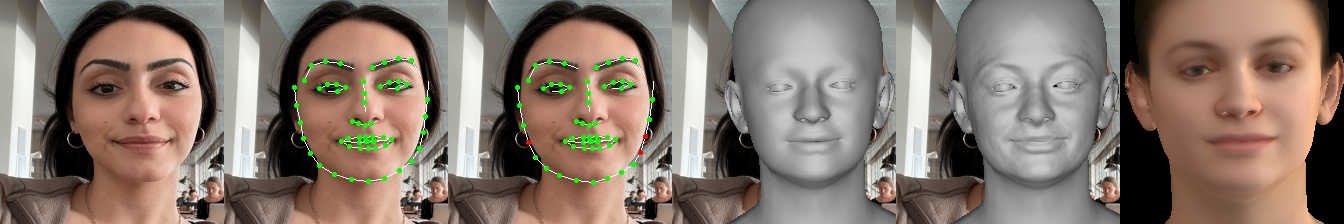

In [15]:
### Visualize some results
from google.colab.patches import cv2_imshow
def show_img(path):
  img = cv2.imread(path)
  cv2_imshow(img)

path1 = "/content/DECA/TestSamples/my_examples/results/synthetic_vis.jpg"
path11 = "/content/DECA/TestSamples/my_examples/results/synthetic_vis_original_size.jpg"
path2 = '/content/DECA/TestSamples/my_examples/results/real_test_vis.jpg'
path22 = "/content/DECA/TestSamples/my_examples/results/real_test_vis_original_size.jpg"
show_img(path11)
show_img(path22)

**Expression transfer from another image (2D image of face with desired expression) to the 3D generated avatar**
Specify the path to the image of the face of the targt 3D generated avatar. Also specify the path for the image, that changes the expression of the target avatar. All results for expression transfer are stored under /content/DECA/TestSamples/expression_transfer

In [16]:
### Expression transfer from source image to target 3D avatar
!python demos/demo_transfer.py --rasterizer_type "standard" \
--image_path "TestSamples/my_examples/real_test.png" \
--exp_path "TestSamples/my_examples/synthetic.png"  --savefolder 'TestSamples/expression_transfer' \
--saveDepth True --useTex True #--saveObj True
#you can try "pytorch3d" as a rasterizer step, if you have downloaded it

creating the FLAME Decoder
tcmalloc: large alloc 1251999744 bytes == 0x65ea0000 @  0x7f9afd9011e7 0x7f9af19c246e 0x7f9af1a12c2b 0x7f9af19c5ce8 0x5947d6 0x548cc1 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x4bc98a 0x533274 0x4d3969 0x512147 0x549e0e 0x4bcb19 0x532b86 0x594a96 0x515600 0x549e0e 0x593fce 0x548ae9 0x51566f 0x549e0e 0x4bca8a 0x532b86 0x594a96 0x548cc1 0x5127f1 0x549e0e
trained model found. load /content/DECA/data/deca_model.tar
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/content/DECA/decalib/deca.py:128: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output channels_last tensor even if some of the inputs are not in

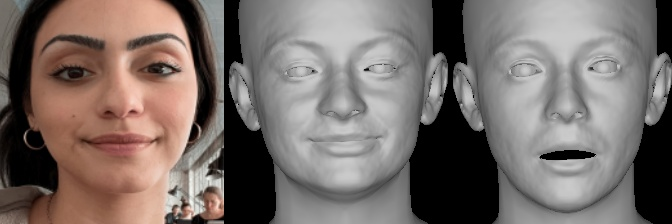

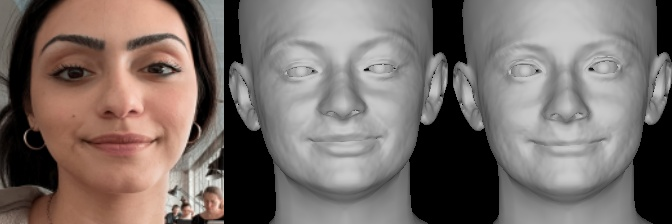

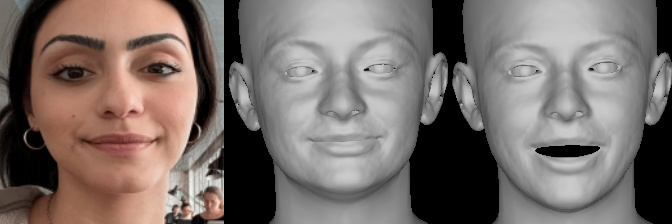

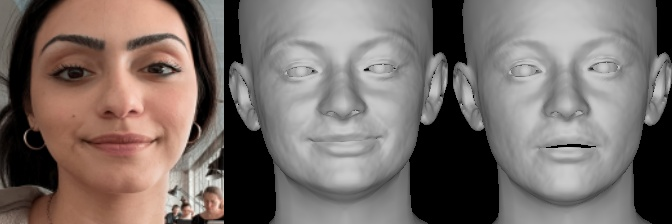

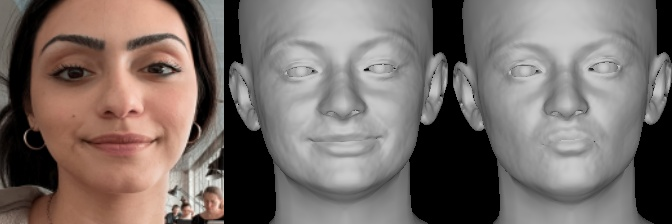

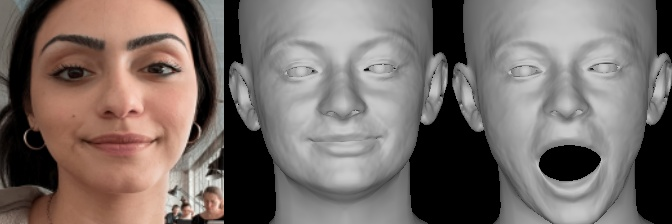

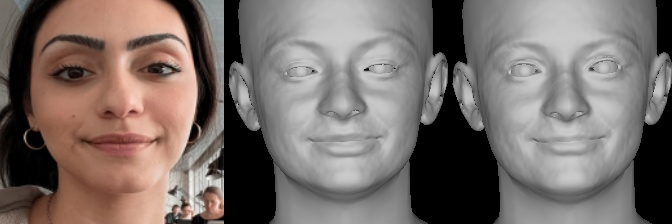

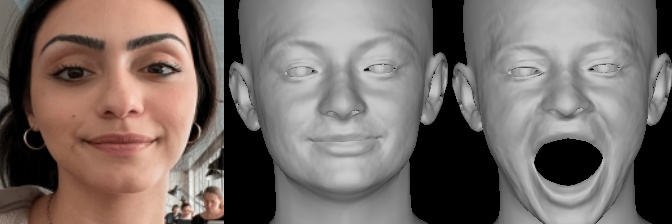

In [17]:
### Expression transfer for a variety of expressions
source_image = "TestSamples/my_examples/real_test.png"
save_folder = "TestSamples/expression_transfer"
root = "/content/DECA/"
expression_root = "/content/DECA/TestSamples/exp"
for exp in os.listdir(expression_root):
  target_expression = os.path.join(expression_root, exp)
  output_folder = os.path.join(save_folder, str(exp.split('.')[0]))
  #print("Target expresion ---> ", target_expression)
  cmd = 'python demos/demo_transfer.py  --image_path %s --exp_path %s  --savefolder %s ' \
  '--saveDepth True --useTex True'%(source_image, target_expression,output_folder)
  os.system(cmd)
  try:
    #pic_path = os.path.join(output_folder, str(source_image.split('/')[-1]))
    pic_path = os.path.join(root+"/",output_folder, str(source_image.split('/')[-1]).split('.')[0]+"_animation.jpg")
    show_img(pic_path)
  except:
    #print('Could not find', pic_path)
    pass
  

### Save & Download results locally

In [18]:
!zip   -r /content/mesh.zip /content/DECA/TestSamples/my_examples/results/

  adding: content/DECA/TestSamples/my_examples/results/ (stored 0%)
  adding: content/DECA/TestSamples/my_examples/results/real_test/ (stored 0%)
  adding: content/DECA/TestSamples/my_examples/results/real_test/real_test_detail.obj (deflated 62%)
  adding: content/DECA/TestSamples/my_examples/results/real_test/real_test.obj (deflated 60%)
  adding: content/DECA/TestSamples/my_examples/results/real_test/real_test_normals.png (deflated 4%)
  adding: content/DECA/TestSamples/my_examples/results/real_test/real_test.mtl (deflated 21%)
  adding: content/DECA/TestSamples/my_examples/results/real_test/real_test_depth.jpg (deflated 3%)
  adding: content/DECA/TestSamples/my_examples/results/real_test/real_test.png (deflated 1%)
  adding: content/DECA/TestSamples/my_examples/results/real_test_vis.jpg (deflated 6%)
  adding: content/DECA/TestSamples/my_examples/results/synthetic/ (stored 0%)
  adding: content/DECA/TestSamples/my_examples/results/synthetic/synthetic_depth.jpg (deflated 3%)
  adding

In [19]:
from google.colab import files
files.download("/content/mesh.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Save in GoogleDrive

In [20]:
### Create DECA folder in Gdrive if it does not exist
import os
import random
import datetime
deca_gpath = "/content/drive/MyDrive/deca"
if os.path.exists(deca_gpath):
  print("Folder exists")
else:
  cmd = 'mkdir /content/drive/MyDrive/deca'
  os.system(cmd)

#os.makedirs('/content/drive/MyDrive/deca', exists=True)

x = datetime.datetime.now()
dest_folder = str(x).split(' ')[0].replace("-", "_") + "_" + str(random.randrange(0,10))
cmd = "cp -r %s/. %s"%("/content/DECA/TestSamples/my_examples/results", os.path.join(deca_gpath, dest_folder)) 
os.system(cmd)


Folder exists


0

In [21]:
### Save also expression results
deca_gpath = "/content/drive/MyDrive/deca"
dest_folder = str(x).split(' ')[0].replace("-", "_") + "_expression_" + str(random.randrange(0,10))
cmd = "cp -r %s/. %s"%("/content/DECA/TestSamples/expression_transfer", os.path.join(deca_gpath, dest_folder))
os.system(cmd)

0

### Visualization

#### Install pytorch 3D and import modules

In [22]:
import os
import sys
import torch
need_pytorch3d=True
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.11.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py37_cu113_pyt1110/download.html
     |████████████████████████████████| 43.2 MB 1.2 MB/s 


In [23]:
import os
import torch
import matplotlib.pyplot as plt

# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, load_obj

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)

# add path for demo utils functions 
import sys
import os
sys.path.append(os.path.abspath(''))

In [24]:
!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
from plot_image_grid import image_grid

--2022-05-05 14:08:10--  https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1608 (1.6K) [text/plain]
Saving to: ‘plot_image_grid.py’

plot_image_grid.py  100%[===================>]   1.57K  --.-KB/s    in 0s      

2022-05-05 14:08:10 (29.8 MB/s) - ‘plot_image_grid.py’ saved [1608/1608]



#### Visualize mesh file & texture map (.obj) 
This is along the lines of the official Pytorch 3D tutorials.


Select path to .obj file. **Make sure that the respective .mtl file is in the same directory**

In [25]:
#verts, faces, aux = load_obj(')
obj_filename = '/content/DECA/TestSamples/my_examples/results/real_test/real_test.obj'
device = torch.device("cuda:0")
mesh = load_objs_as_meshes([obj_filename], device=device)

Display texture map

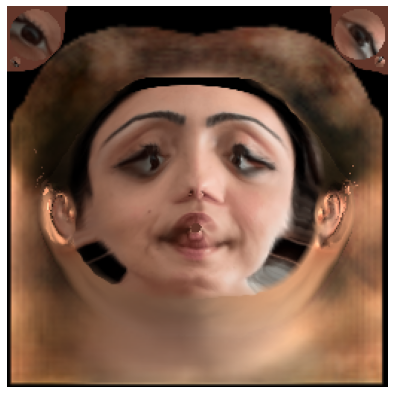

In [26]:
plt.figure(figsize=(7,7))
texture_image=mesh.textures.maps_padded()
plt.imshow(texture_image.squeeze().cpu().numpy())
plt.axis("off");

Setup renderer and its parameters (lightning, extrinsic parameters)

In [83]:
# Initialize a camera.
# With world coordinates +Y close or far away, +X up and down and +Z tilted in front or back, the front of the face is facing the Z direction. 
# So we move the camera by 180 in the azimuth direction so it is facing the front of the cow. 
R, T = look_at_view_transform(0.6, 5, 0)  # (y, X, z)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

# Define the settings for rasterization and shading. Here we set the output image to be of size
# 1024x1024. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# and blur_radius=0.0. We also set bin_size and max_faces_per_bin to None which ensure that 
# the faster coarse-to-fine rasterization method is used. Refer to rasterize_meshes.py for 
# explanations of these parameters. Refer to docs/notes/renderer.md for an explanation of 
# the difference between naive and coarse-to-fine rasterization. 
raster_settings = RasterizationSettings(
    image_size=1024, 
    blur_radius=0.0, 
    faces_per_pixel=10, 
)

# Place a point light in front of the object. As mentioned above, the front of the face avatar is facing the 
# z direction. 
lights = PointLights(device=device, location=[[0, 1, 5]])

# Create a Phong renderer by composing a rasterizer and a shader. The textured Phong shader will 
# interpolate the texture uv coordinates for each vertex, sample from a texture image and 
# apply the Phong lighting model
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras, 
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device=device, 
        cameras=cameras,
        lights=lights
    )
)

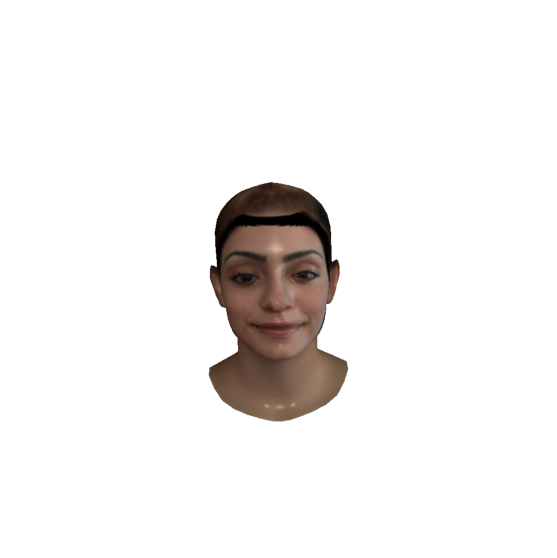

In [84]:
images = renderer(mesh)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off");